QC-AtomDB Getting Started
=============================

This tutorial shows how to use QC-AtomDB as a Python script or library.


Learning outcomes
-----------------

- Script usage

- Atom-DB as a Python library

    - Loading/Dumping atomic species data

    - Getting properties

Requirements
------------
Further down it is assumed the package has been installed and the datasets compiled. Please, check the pertinent [instructions](https://github.com/QuantumElephant/atomdb#installation) provided in the README file.

Script usage
------------

A basic functionality is provided through the command line interface.

* Checked the command line options with:
    * `python -m atomdb -h`



* To retrieve Slater's dataset data for the neutral Carbon atom do:
    * `python -m atomdb -q slater C 0 3`

In [ ]:
import sys  
sys.path.insert(0, '../../')

Atom-DB as a Python library
----------------------------

The following lines should appear at the beginning of the scripts:

In [1]:
# Import the Atom-DB library
import atomdb

# Optional modules
import numpy as np
from matplotlib import pyplot


### Loading/Dumping Data

Use the `atomdb.load` function to retrieve information from a datasets for an atomic spcie (defined by the element symbol, charge, multiplicity and state parameters).

In [2]:
# Define specie and load data
element = 'Cl'
charge = 0
mult = 2
dataset = 'slater'

atom = atomdb.load(element, charge, mult, dataset=dataset)

For details on the available datasets see [add link to doc]() 

Currently we only support neutral/charged elements in its ground state, therefore, as shown above for neutral Carbon, the state (nexc parameter) is not specified, leaving it to take its dafault value.



All information stored about a specie can be outputted in a JSON file format using:

In [ ]:
# Dumping Data to a JSON File
atom.to_json()

### Getting Atomic Properties

Several scalar and vector properties (mostly related to the electron density) are accesible some of which are showcased below.

Refer to [add link to doc]() for details on the supported properties.  
Note that for properties like the covalent atomic radius that have several data sources we use dictionaries.

* Scalars

In [3]:
print("Element: ", atom.elem)
print('-'*12)
# Scalars
print("Mass (a.u.):", atom.mass)
print("Energy (Hartree):", atom.energy)
print("Ionization potential (Hartree):", atom.ip)
print("COV_RADII (a.u.):", atom.cov_radii)

Element:  Cl
------------
Mass (a.u.): 35.4515
Energy (Hartree): 459.482072308
Ionization potential (Hartree): None
COV_RADII (a.u.): {'cordero': 1.9275206565996772, 'bragg': 1.9842124406173147, 'slater': 1.889726133921252}


* Vectors

In [4]:
# Atomic orbitals
print("Number:", atom.ao.norba)
print("Energies (Hartree):", atom.ao.energy_a)
print("Alpha occupations:", atom.ao.occs_a)
print("Beta occupations:", atom.ao.occs_b)

Number: 5
Energies (Hartree): [-104.8844208  -10.6074807   -1.0729121   -8.0722274   -0.5063999]
Alpha occupations: [1. 1. 1. 3. 3.]
Beta occupations: [1. 1. 1. 3. 2.]


* Density related properties

Two methods are available to compute density-related properties: `interpolate_dens` and `interpolate_ked`; they return spline functions (cubic splines) that can be evaluated at a radial grid. Optionally, one can select the type of orbitals included in the calculation and take a subset of them by specifying their spin component and index, respectively (by default, all occupied alpha and beta spin-orbitals are included, `spin=ab` and `index=None`). Also, density derivatives are accessible through the `deriv` parameter passed to the splines.

In [5]:
rad_grid = np.linspace(0., 1., num=50)
dens_spline = atom.interpolate_dens(log=True)
dens = dens_spline(rad_grid)

d_dens = dens_spline(rad_grid, deriv=1)

Text(0.5, 0.98, 'Element Cl, dataset slater')

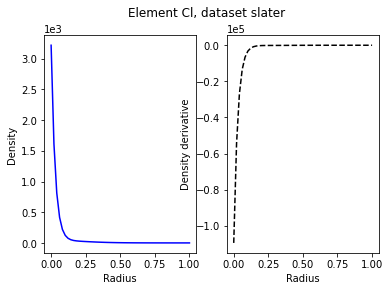

In [6]:
fig, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(rad_grid, dens, '-b')
ax2.plot(rad_grid, d_dens, '--k')
ax1.set(xlabel="Radius", ylabel="Density")
ax2.set(xlabel="Radius", ylabel="Density derivative")
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
fig.suptitle(f'Element {atom.elem}, dataset {atom.dataset}')

In [8]:
rad_grid = np.linspace(0., 1., num=50)
ked_spline = atom.interpolate_ked(log=False)
dens = ked_spline(rad_grid)

Text(0.5, 1.0, 'Element Cl, dataset slater')

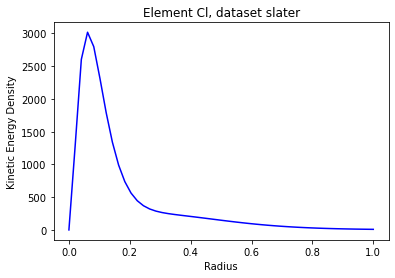

In [9]:
fig, ax = pyplot.subplots()
ax.plot(rad_grid, dens, color="blue")
ax.set_xlabel("Radius")
ax.set_ylabel("Kinetic Energy Density")
ax.set_title(f'Element {atom.elem}, dataset {atom.dataset}')